### Unir los datos

In [38]:
import pandas as pd

# Definir las rutas de los archivos CSV
file_paths = {
    "WEB": "Data/Web.csv",
    "VISIT": "Data/Visit.csv",
    "OFFLINE": "Data/Offline.csv",
    "TIME": "Data/Time.csv",
    "INV": "Data/Inv.csv",
}

# Revisar las columnas en cada archivo
for name, path in file_paths.items():
    df_combined = pd.read_csv(path, sep=';')
    print(f"📂 Dataset {name} - Columnas: {df_combined.columns.tolist()}")


📂 Dataset WEB - Columnas: ['ID_Date,Unique_visitors,PDFBrochuresDownloaded,ProductConfigurator,Product_configurator_Visists,SocialNetworks,DirectTraffic,EMail,NaturalSearch,OnlineMedia,OtherReferrer,PaidSearch']
📂 Dataset VISIT - Columnas: ['ID_Date,RopaHombre,RopaMujer,Complementos,Zapatos,Home,Interior,Otros,SR_Total']
📂 Dataset OFFLINE - Columnas: ['ID_Date,Visit_Store,Mercado,Sales,Complementos,Ropa_hombre,Zapatos,Ropa_Mujer,Home,Interior,Otros,Ticket_medio']
📂 Dataset TIME - Columnas: ['ID_Date,Dias_mes,Dia_inicio_mes,Dia_findemes,working_days,Dias_fines_semana,Easterweek']
📂 Dataset INV - Columnas: ['ID_Date,CINE,EXTERIOR,INTERNET,PRENSA,PRODUCCION,RADIO,REVISTAS,PlataformasVideo,VARIOS,INV_Total']


In [39]:
import pandas as pd

# Definir las rutas de los archivos CSV
file_paths = {
    "WEB": "Data/Web.csv",
    "VISIT": "Data/Visit.csv",
    "OFFLINE": "Data/Offline.csv",
    "TIME": "Data/Time.csv",
    "INV": "Data/Inv.csv",
}

# Cargar y procesar los datasets
dataframes = {}

for name, path in file_paths.items():
    df_combined = pd.read_csv(path, sep=",", dtype=str, engine="python")  # Leer con el separador correcto
    df_combined.columns = df_combined.columns[0].split(",") if len(df_combined.columns) == 1 else df_combined.columns  # Corregir columnas si es necesario

    if "ID_Date" not in df_combined.columns:
        print(f"⚠️ Error en {name}: No se encontró la columna 'ID_Date'. Columnas detectadas: {df_combined.columns.tolist()}")
        continue  # Saltar este dataset si no tiene la columna correcta

    df_combined.rename(columns={"ID_Date": "Fecha"}, inplace=True)  # Renombrar 'ID_Date' a 'Fecha'
    df_combined["Fecha"] = pd.to_datetime(df_combined["Fecha"], format="%Y%m", errors="coerce")  # Convertir a datetime

    # Convertir columnas numéricas
    for col in df_combined.columns:
        if col != "Fecha":
            df_combined[col] = df_combined[col].str.replace(",", ".", regex=True).astype(float)

    df_combined.set_index("Fecha", inplace=True)  # Establecer 'Fecha' como índice
    dataframes[name] = df_combined

# Unir todos los datasets en un solo DataFrame
df_combined = pd.concat(dataframes.values(), axis=1)

# Rellenar valores nulos
df_combined.fillna(0, inplace=True)

# Mostrar las primeras filas
df_combined.head()

,Unique_visitors,PDFBrochuresDownloaded,ProductConfigurator,Product_configurator_Visists,SocialNetworks,DirectTraffic,EMail,NaturalSearch,OnlineMedia,OtherReferrer,...,CINE,EXTERIOR,INTERNET,PRENSA,PRODUCCION,RADIO,REVISTAS,PlataformasVideo,VARIOS,INV_Total
Fecha,,,,,,,,,,,,,,,,,,,,,
2022-01-01,272382.0,4838.0,33222.0,94248.0,1415.0,65373.0,25.0,167199.0,63649.0,39808.0,...,59887.84,8200.00,133666.43,0.0,6050.0,2426.40,18013.50,338824.94,7531.03,574600.14
2022-02-01,352581.0,5823.0,38570.0,109531.0,546.0,77209.0,26.0,176733.0,124861.0,45543.0,...,72291.56,94627.51,189275.94,10000.0,6700.0,0.00,49110.91,487537.14,6972.02,916515.08
2022-03-01,332955.0,4845.0,33956.0,97805.0,5444.0,83178.0,341.0,173514.0,104132.0,43583.0,...,55000.00,0.00,214037.62,4500.0,3700.0,0.00,0.00,75000.00,15284.85,367522.47
2022-04-01,282169.0,3711.0,45949.0,90689.0,1184.0,69335.0,162.0,162805.0,74044.0,39650.0,...,10883.30,0.00,194816.97,48800.0,21550.0,1140.00,40876.00,610865.89,12255.75,941187.91
2022-05-01,261829.0,9037.0,48685.0,92069.0,8648.0,70972.0,210.0,156011.0,44196.0,40472.0,...,74333.20,0.00,130795.16,11000.0,4900.0,102851.86,20775.75,393807.74,7926.46,746390.17


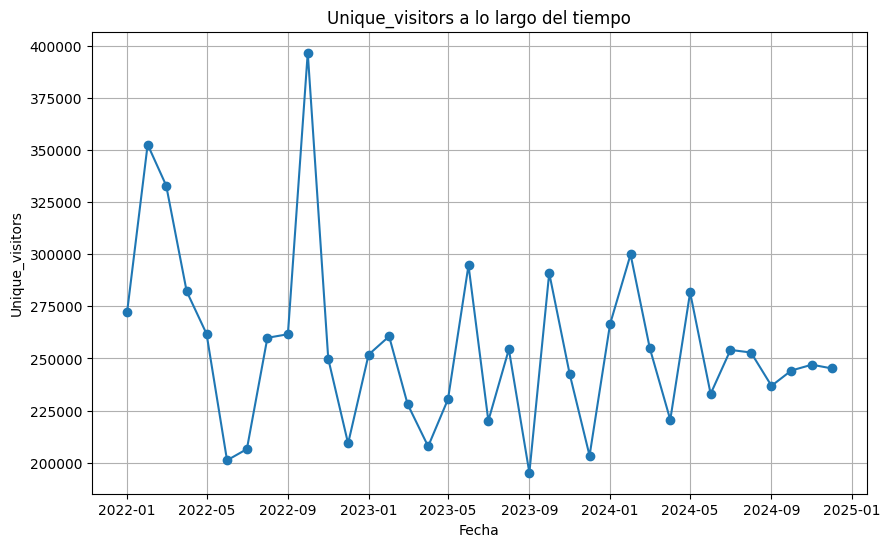

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Verificar que 'Fecha' ya está en formato datetime y es el índice
if not isinstance(df_combined.index, pd.DatetimeIndex):
    df_combined.index = pd.to_datetime(df_combined.index, format="%Y%m")

# Resampleo mensual (los datos ya son mensuales, pero aseguramos estructura)
df_monthly = df_combined.resample('MS').mean()

# Elegir la métrica a graficar
columna_grafico = "Unique_visitors"  

# Filtrar valores nulos
df_monthly_filtered = df_monthly.dropna(subset=[columna_grafico])

# Graficar la métrica elegida
plt.figure(figsize=(10, 6))
plt.plot(df_monthly_filtered.index, df_monthly_filtered[columna_grafico], marker='o', linestyle='-')
plt.title(f'{columna_grafico} a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel(columna_grafico)
plt.grid(True)
plt.show()

In [41]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba (80% entrenamiento, 20% prueba)
train_size = int(len(df_monthly_filtered) * 0.77)
train, test = df_monthly_filtered.iloc[:train_size], df_monthly_filtered.iloc[train_size:]






c:\Users\aserr\Documents\GitHub\Caso02.-Modelo-de-Atribuci-n\env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\aserr\Documents\GitHub\Caso02.-Modelo-de-Atribuci-n\env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\aserr\Documents\GitHub\Caso02.-Modelo-de-Atribuci-n\env\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Métricas del Modelo SARIMA (1, 0, 3)(0, 1, 1, 12): (1491986517.038973, 33142.54337482801, np.float64(38626.24130094686), -4.873916684280117)


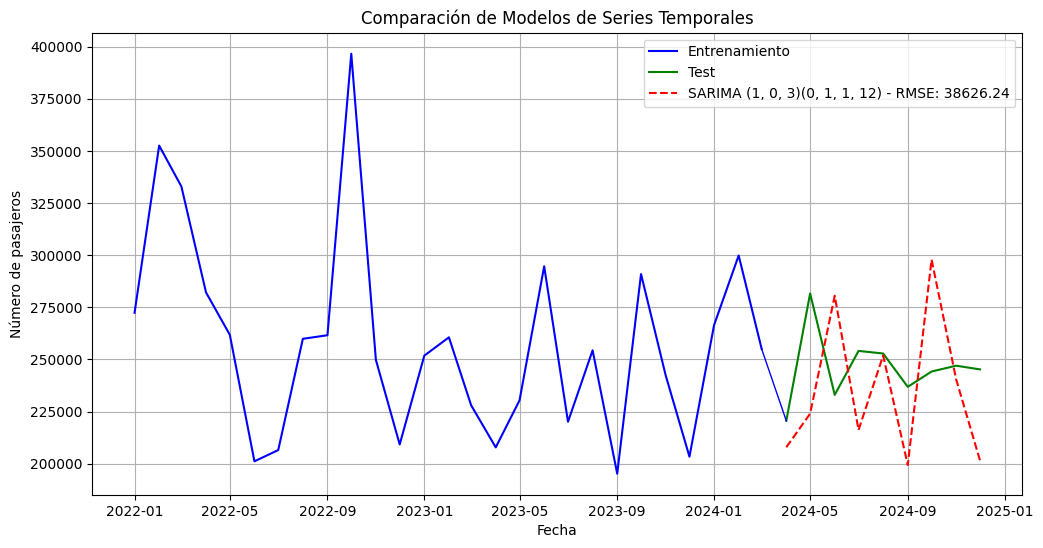

ARIMA - AIC: 368.4168178090614 BIC: 371.95706881457244
SARIMA - AIC: 368.4168178090614 BIC: 371.95706881457244

Coeficientes SARIMA (1, 0, 3)(0, 1, 1, 12):
                                      SARIMAX Results                                       
Dep. Variable:                      Unique_visitors   No. Observations:                   27
Model:             SARIMAX(0, 0, 3)x(0, 1, [1], 12)   Log Likelihood                -179.208
Date:                             ju., 10 abr. 2025   AIC                            368.417
Time:                                      12:07:53   BIC                            371.957
Sample:                                  01-01-2022   HQIC                           368.379
                                       - 03-01-2024                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------

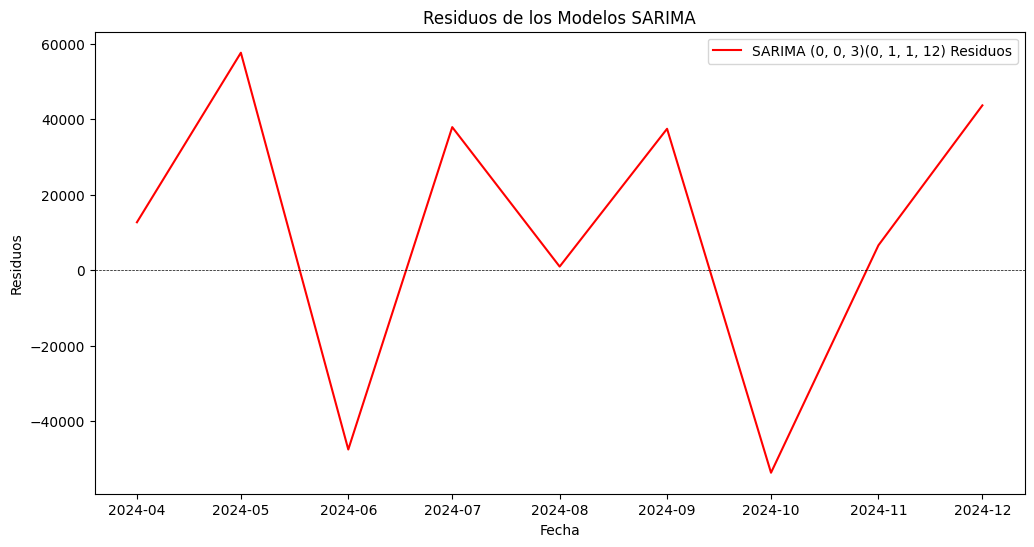

                Fecha  SARIMA (1, 0, 3)(0, 1, 1, 12) Residuos
Fecha                                                        
2024-04-01 2024-04-01                            12702.729409
2024-05-01 2024-05-01                            57657.954720
2024-06-01 2024-06-01                           -47537.957368
2024-07-01 2024-07-01                            37934.155239
2024-08-01 2024-08-01                              958.084923
2024-09-01 2024-09-01                            37493.769620
2024-10-01 2024-10-01                           -53694.266080
2024-11-01 2024-11-01                             6602.022834
2024-12-01 2024-12-01                            43701.950182


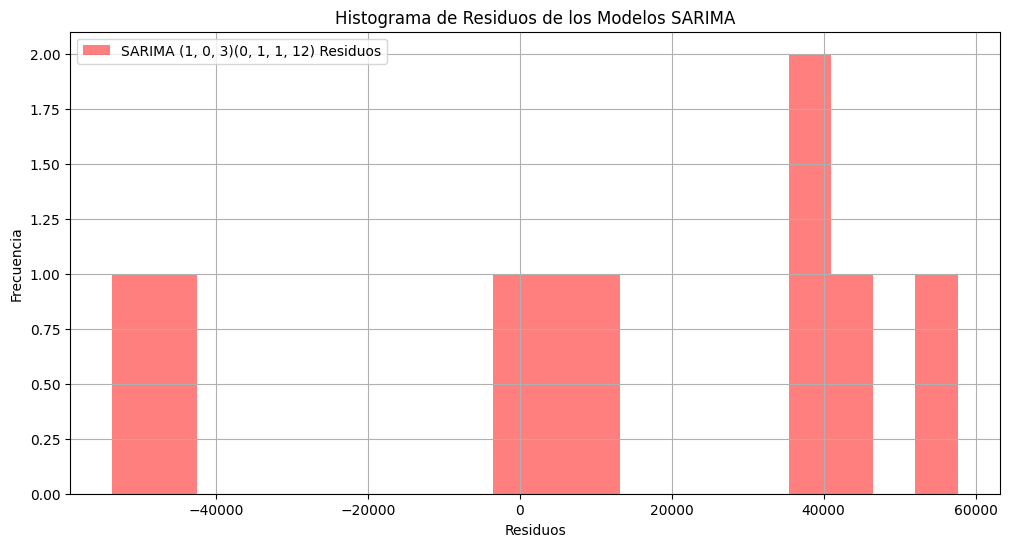

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ARIMA, SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


# Ajustar y predecir el modelo SARIMA
sarima_model2 = SARIMAX(train['Unique_visitors'], order=(0, 0, 3), seasonal_order=(0, 1, 1, 12))
sarima_fit2 = sarima_model2.fit()
sarima_predictions2 = sarima_fit2.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

# Calcular métricas de validación para cada modelo
def calcular_metricas(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, rmse, r2

# Calculamos las métricas para cada modelo

sarima_metrics2 = calcular_metricas(test['Unique_visitors'], sarima_predictions2)

# Imprimir las métricas

print("Métricas del Modelo SARIMA (1, 0, 3)(0, 1, 1, 12):", sarima_metrics2)

# Graficar los resultados
plt.figure(figsize=(12, 6))

# 1. Graficar train (azul) y test (verde) como una línea continua conectada
plt.plot(train.index, train['Unique_visitors'], color='blue', label='Entrenamiento')
plt.plot(test.index, test['Unique_visitors'], color='green', label='Test') 

# 2. Conectar el último punto de train con el primero de test (para evitar el "corte")
last_train_point = train.index[-1], train['Unique_visitors'].iloc[-1]
first_test_point = test.index[0], test['Unique_visitors'].iloc[0]
plt.plot([last_train_point[0], first_test_point[0]], 
          [last_train_point[1], first_test_point[1]], 
          color='blue', linestyle='-', linewidth=1)  # Usa 'blue' o 'green' según prefieras

# 3. Predicciones del modelo (línea discontinua roja)
plt.plot(test.index, sarima_predictions2, 
         label=f'SARIMA (1, 0, 3)(0, 1, 1, 12) - RMSE: {sarima_metrics2[2]:.2f}', 
         linestyle='--', color='red')

plt.xlabel('Fecha')
plt.ylabel('Número de pasajeros')
plt.title('Comparación de Modelos de Series Temporales')
plt.legend()
plt.grid(True)
plt.show()

# Imprimir AIC y BIC
print("ARIMA - AIC:", sarima_fit2.aic, "BIC:", sarima_fit2.bic)
print("SARIMA - AIC:", sarima_fit2.aic, "BIC:", sarima_fit2.bic)

# Imprimir coeficientes

print("\nCoeficientes SARIMA (1, 0, 3)(0, 1, 1, 12):")
print(sarima_fit2.summary())

# Obtener los residuos de cada modelo

sarima_residuals2 = test['Unique_visitors'] - sarima_predictions2

# Graficar los residuos
plt.figure(figsize=(12, 6))

plt.plot(test.index, sarima_residuals2, label='SARIMA (0, 0, 3)(0, 1, 1, 12) Residuos', color='red')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5)
plt.xlabel('Fecha')
plt.ylabel('Residuos')
plt.title('Residuos de los Modelos SARIMA')
plt.legend()
plt.show()

# Crear un DataFrame para los residuos
residuals_df = pd.DataFrame({
    'Fecha': test.index,
   
    'SARIMA (1, 0, 3)(0, 1, 1, 12) Residuos': sarima_residuals2
})

# Mostrar la tabla de resultados
print(residuals_df)

# Obtener los residuos de cada modelo

sarima_residuals2 = test['Unique_visitors'] - sarima_predictions2

# Graficar un histograma de los residuos
plt.figure(figsize=(12, 6))

plt.hist(sarima_residuals2, bins=20, color='red', alpha=0.5, label='SARIMA (1, 0, 3)(0, 1, 1, 12) Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos de los Modelos SARIMA')
plt.legend()
plt.grid(True)
plt.show()

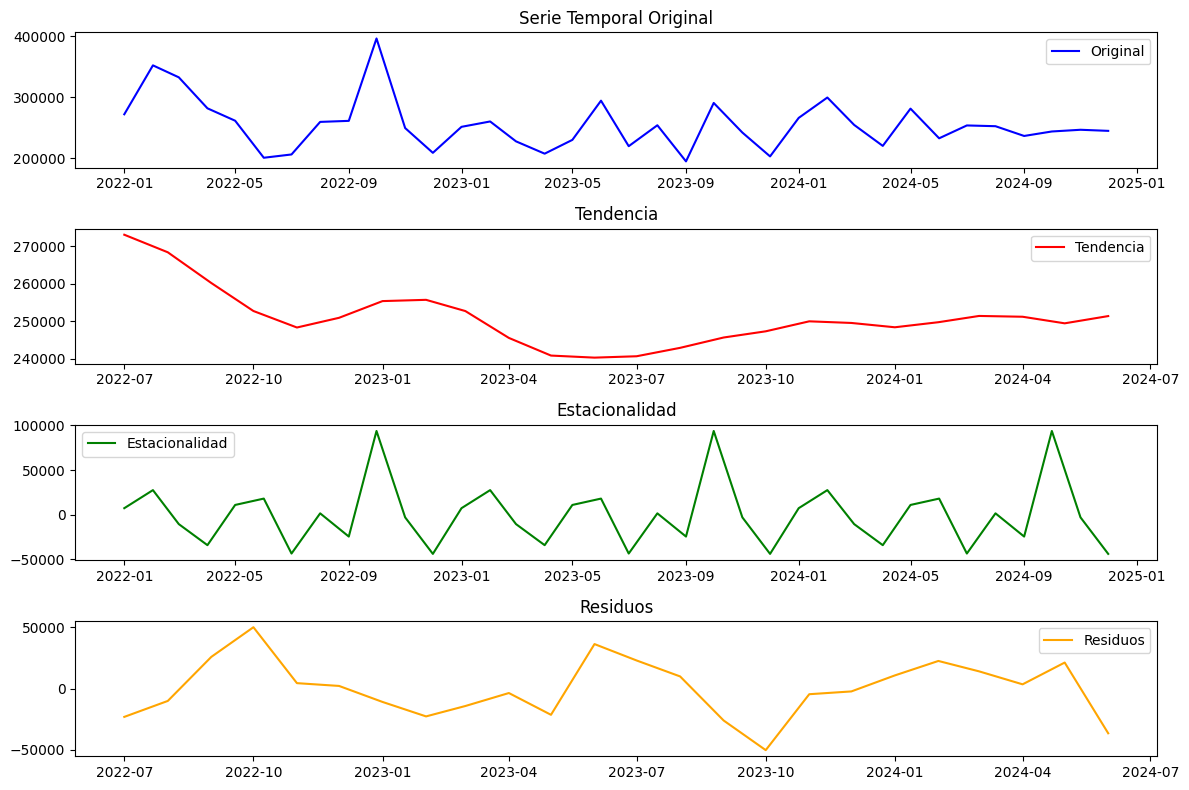

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


# Descomposición de la serie temporal
decomposition = seasonal_decompose(df_combined['Unique_visitors'], model='additive')

# Obtención de las componentes
trend = decomposition.trend
seasonal = decomposition.seasonal
residuals = decomposition.resid

# Graficar las componentes
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df_combined['Unique_visitors'], label='Original', color='blue')
plt.legend()
plt.title('Serie Temporal Original')

plt.subplot(412)
plt.plot(trend, label='Tendencia', color='red')
plt.legend()
plt.title('Tendencia')

plt.subplot(413)
plt.plot(seasonal, label='Estacionalidad', color='green')
plt.legend()
plt.title('Estacionalidad')

plt.subplot(414)
plt.plot(residuals, label='Residuos', color='orange')
plt.legend()
plt.title('Residuos')

plt.tight_layout()
plt.show()




c:\Users\aserr\Documents\GitHub\Caso02.-Modelo-de-Atribuci-n\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\aserr\Documents\GitHub\Caso02.-Modelo-de-Atribuci-n\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\aserr\Documents\GitHub\Caso02.-Modelo-de-Atribuci-n\env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\aserr\Documents\GitHub\Caso02.-Modelo-de-Atribuci-n\env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except f

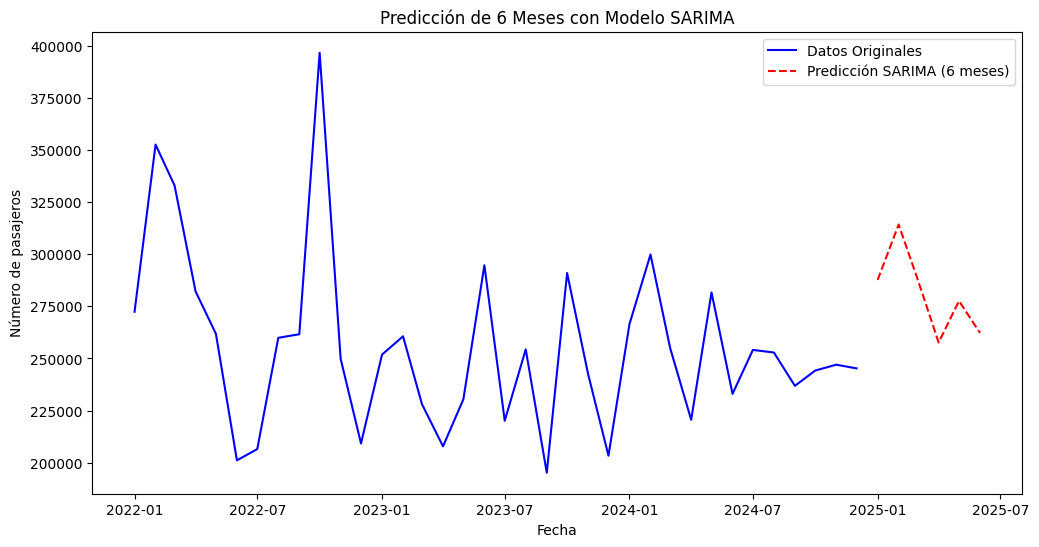

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SARIMAX
import numpy as np

# Ajustar el modelo SARIMA a todos los datos
sarima_model = SARIMAX(df_combined['Unique_visitors'], order=(1, 0, 3), seasonal_order=(0, 1, 1, 12))
sarima_fit = sarima_model.fit()

# Realizar la predicción de los próximos 6 meses
start_date = df_combined.index[-1] + pd.DateOffset(months=1)
end_date = start_date + pd.DateOffset(months=5)
sarima_predictions_6months = sarima_fit.predict(start=start_date, end=end_date, typ='levels')

# Graficar las predicciones de los próximos 6 meses
plt.figure(figsize=(12, 6))
plt.plot(df_combined.index, df_combined['Unique_visitors'], label='Datos Originales', color='blue')
plt.plot(sarima_predictions_6months.index, sarima_predictions_6months, label='Predicción SARIMA (6 meses)', color='red', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Número de pasajeros')
plt.title('Predicción de 6 Meses con Modelo SARIMA')
plt.legend()
plt.show()


c:\Users\aserr\Documents\GitHub\Caso02.-Modelo-de-Atribuci-n\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\aserr\Documents\GitHub\Caso02.-Modelo-de-Atribuci-n\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


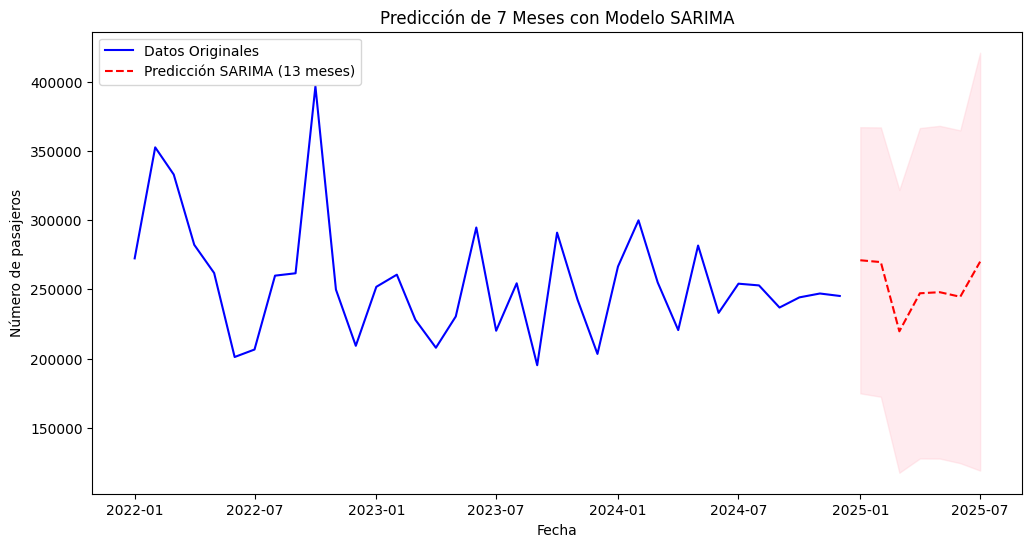

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SARIMAX

# Ajustar el modelo SARIMA a todos los datos
sarima_model = SARIMAX(df_combined['Unique_visitors'], order=(1, 0, 3), seasonal_order=(0, 1, 1, 6))
sarima_fit = sarima_model.fit()

# Obtener predicciones y sus intervalos de confianza para los próximos 12 meses
forecast = sarima_fit.get_forecast(steps=7)  # Predicción de 12 meses + 1 (13 meses en total)
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Graficar las predicciones de los próximos 12 meses con intervalo de confianza
plt.figure(figsize=(12, 6))
plt.plot(df_combined.index, df_combined['Unique_visitors'], label='Datos Originales', color='blue')
plt.plot(forecast_values.index, forecast_values, label='Predicción SARIMA (13 meses)', color='red', linestyle='--')
plt.fill_between(forecast_values.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Fecha')
plt.ylabel('Número de pasajeros')
plt.title('Predicción de 7 Meses con Modelo SARIMA')
plt.legend()
plt.show()


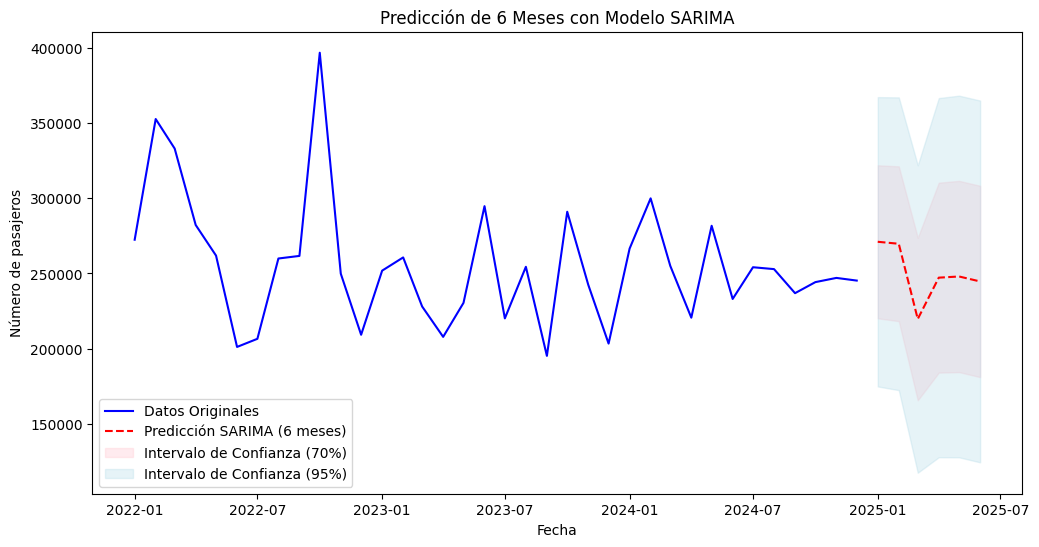

In [46]:
# Obtener las predicciones para los próximos 6 meses
forecast = sarima_fit.get_forecast(steps=6)
sarima_predictions_6months = forecast.predicted_mean

# Obtener los intervalos de confianza del 70% y 95%
confidence_intervals_70 = forecast.conf_int(alpha=0.3)
confidence_intervals_95 = forecast.conf_int(alpha=0.05)

# Graficar las predicciones de los próximos 6 meses con intervalos de confianza
plt.figure(figsize=(12, 6))
plt.plot(df_combined.index, df_combined['Unique_visitors'], label='Datos Originales', color='blue')
plt.plot(sarima_predictions_6months.index, sarima_predictions_6months, label='Predicción SARIMA (6 meses)', color='red', linestyle='--')
plt.fill_between(sarima_predictions_6months.index, confidence_intervals_70.iloc[:, 0], confidence_intervals_70.iloc[:, 1], color='pink', alpha=0.3, label='Intervalo de Confianza (70%)')
plt.fill_between(sarima_predictions_6months.index, confidence_intervals_95.iloc[:, 0], confidence_intervals_95.iloc[:, 1], color='lightblue', alpha=0.3, label='Intervalo de Confianza (95%)')
plt.xlabel('Fecha')
plt.ylabel('Número de pasajeros')
plt.title('Predicción de 6 Meses con Modelo SARIMA')
plt.legend()
plt.show()
